# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
0.0
0.0
0.0
-0.002
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.002
-0.002
0.0
-0.002
-0.003
-0.002
0.992
0.991
0.99
0.991
1.986
1.986
1.984
1.985
2.983
2.983
2.982
2.982
3.977
3.977
3.976
3.976
4.969
4.968
4.968
4.969
5.966
5.966
5.964
5.964
6.703
6.705
6.707
6.705
6.705
7.441
7.443
7.444
7.444
7.444
8.433
8.435
8.437
8.437
8.437
9.427
9.429
9.432
9.431
9.431
10.422
10.422
10.421
10.421
11.408
11.412
11.414
11.413
11.413
12.403
12.407
12.409
12.409
12.408
13.401
13.404
13.406
13.405
13.405
14.137
14.139
14.142
14.141
14.142
14.874
14.877
14.88
14.877
14.878
15.875
15.875
15.875
15.875
16.874
16.874
16.874
16.874
17.873
17.873
17.872
17.872
18.873
18.873
18.872
18.871
19.872
19.872
19.871
19.871
20.871
20.871
20.87
20.87
21.566
21.566
21.564
21.565
22.263
22.263
22.263
22.262
23.249
23.249
23.249
23.248
24.233
24.233
24.231
24.231
24.2

56.953
56.953
56.953
56.953
56.952
56.952
56.952
56.952
56.952
56.952
56.952
56.952
56.952
56.952
56.952
56.952
56.952
56.95
56.95
56.95
56.95
56.95
56.988
56.988
57.028
57.073
57.117
57.117
57.158
57.199
57.199
57.199
57.199
57.199
57.199
57.198
57.198
57.223
57.223
57.223
57.223
57.223
57.223
57.223
57.222
57.222
57.223
57.223
57.222
57.222
57.222
57.222
57.221
57.221
57.221
57.221
57.22
57.22
57.22
57.219
57.219
57.219
57.219
57.219
57.219
57.219
57.219
57.218
57.218
57.218
57.218
57.218
57.218
57.218
57.218
57.218
57.217
57.217
57.217
57.217
57.216
57.256
57.298
57.298
57.338
57.338
57.337
57.337
57.337
57.337
57.336
57.336
57.36
57.36
57.36
57.36
57.36
57.36
57.36
57.36
57.359
57.36
57.36
57.359
57.358
57.358
57.358
57.358
57.358
57.358
57.357
57.357
57.357
57.357
57.357
57.357
57.357
57.357
57.356
57.356
57.356
57.356
57.355
57.354
57.354
57.354
57.354
57.354
57.354
57.355
57.354
57.354
57.354
57.354
57.354
57.354
57.353
57.353
57.353
57.353
57.353
57.391
57.436
57.437
57.483
57.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1507,3014,59.606
1508,3016,59.606
1509,3018,59.606
1510,3020,59.606


<IPython.core.display.Javascript object>


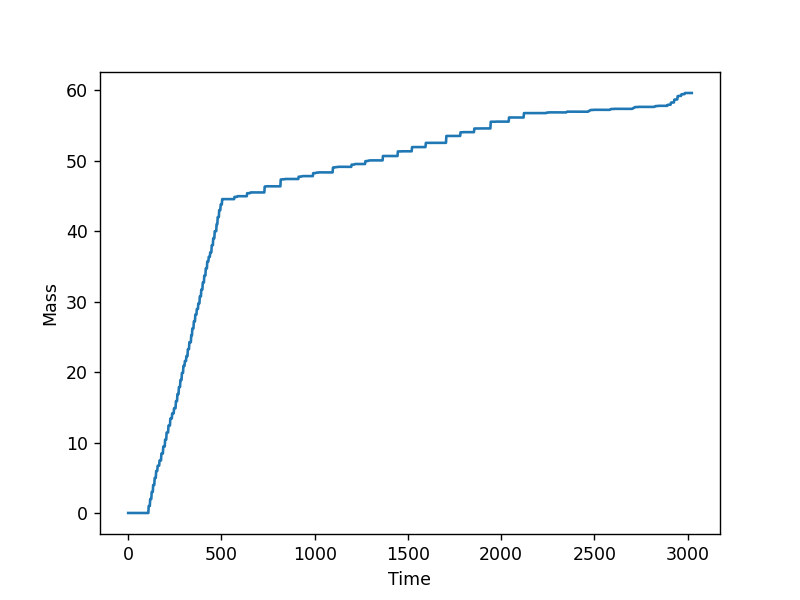

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_140823_S757-762.csv')